# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

In [4]:
sinasc_1 = sinasc_raw[["IDADEMAE", "IDADEPAI", "munResNome"]]
sinasc_1

,IDADEMAE,IDADEPAI,munResNome
0,19,26.0,Alta Floresta D'Oeste
1,29,24.0,Alta Floresta D'Oeste
2,37,32.0,Alta Floresta D'Oeste
3,30,24.0,Alto Alegre dos Parecis
4,30,27.0,Alta Floresta D'Oeste
...,...,...,...
27023,32,35.0,Vilhena
27024,19,NaN,Chupinguaia
27025,24,30.0,Vilhena
27026,21,24.0,Vilhena


### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [7]:
sinasc_1.groupby("munResNome").aggregate(["mean"])

,IDADEMAE,IDADEPAI
,mean,mean
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
sinasc_2 = sinasc_raw[["PESO", "ESCMAE", "SEXO", "DTNASC"]]
sinasc_2

,PESO,ESCMAE,SEXO,DTNASC
0,3685,8 a 11 anos,Masculino,2019-02-19
1,3055,8 a 11 anos,Feminino,2019-02-21
2,3460,8 a 11 anos,Feminino,2019-02-25
3,2982,12 anos ou mais,Feminino,2019-03-20
4,3310,8 a 11 anos,Feminino,2019-03-23
...,...,...,...,...
27023,2110,12 anos ou mais,Masculino,2019-12-13
27024,3310,8 a 11 anos,Masculino,2019-10-04
27025,3065,8 a 11 anos,Masculino,2019-08-02
27026,2352,8 a 11 anos,Masculino,2019-12-23


In [19]:
print("- Vou verificar os tipos das variáveis")

- Vou verificar os tipos das variáveis


In [10]:
sinasc_2.dtypes

PESO       int64
ESCMAE    object
SEXO      object
DTNASC    object
dtype: object

In [18]:
print(" - Vou transformar a variável DTNASC em DATETIME")

 - Vou transformar a variável DTNASC em DATETIME


In [15]:
sinasc_2.loc["DTNASC"] = pd.to_datetime(sinasc_2.loc["DTNASC"])

In [16]:
sinasc_2.dtypes

PESO              object
ESCMAE            object
SEXO              object
DTNASC    datetime64[ns]
dtype: object

In [20]:
sinasc_2.groupby(["DTNASC", "SEXO", "ESCMAE"])["PESO"].mean()

DTNASC      SEXO       ESCMAE         
2019-01-01  Feminino   12 anos ou mais         3370.0
                       4 a 7 anos             3536.25
                       8 a 11 anos        3193.928571
            Masculino  1 a 3 anos              2835.0
                       12 anos ou mais         2857.5
                                             ...     
2019-12-31  Feminino   8 a 11 anos             3418.5
            Masculino  1 a 3 anos              2895.0
                       12 anos ou mais    3348.333333
                       4 a 7 anos         3511.888889
                       8 a 11 anos        3354.166667
Name: PESO, Length: 2586, dtype: object

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?


In [26]:
sinasc_3 = sinasc_raw[["IDADEMAE", "IDADEPAI", "munResNome", "DTNASC"]]
sinasc_3.head(2)

,IDADEMAE,IDADEPAI,munResNome,DTNASC
0,19,26.0,Alta Floresta D'Oeste,2019-02-19
1,29,24.0,Alta Floresta D'Oeste,2019-02-21


In [28]:
sinasc_3.groupby("munResNome")["DTNASC"].count().sort_values(ascending=False)

munResNome
Porto Velho                  8437
Ji-Paraná                    2182
Ariquemes                    1729
Vilhena                      1590
Cacoal                       1374
Rolim de Moura                927
Jaru                          881
Guajará-Mirim                 781
Ouro Preto do Oeste           631
Pimenta Bueno                 616
Buritis                       583
Machadinho D'Oeste            500
Espigão D'Oeste               450
Nova Mamoré                   432
Alta Floresta D'Oeste         367
São Miguel do Guaporé         353
Candeias do Jamari            337
Presidente Médici             304
São Francisco do Guaporé      303
Nova Brasilândia D'Oeste      261
Cerejeiras                    237
Costa Marques                 233
Alto Paraíso                  226
Colorado do Oeste             214
Alvorada D'Oeste              205
Cujubim                       205
Monte Negro                   199
Urupá                         170
Seringueiras                  168
Cam

In [29]:
print("O município que nasceu menos bebês no ano de 2019 foi Castanheiras.")

O município que nasceu menos bebês no ano de 2019 foi Castanheiras.


In [30]:
cast = sinasc_3[sinasc_3["munResNome"] == "Castanheiras"]
cast

,IDADEMAE,IDADEPAI,munResNome,DTNASC
2067,18,17.0,Castanheiras,2019-05-23
2300,31,36.0,Castanheiras,2019-06-21
4512,22,NaN,Castanheiras,2019-05-25
5881,26,24.0,Castanheiras,2019-05-07
5952,32,29.0,Castanheiras,2019-06-21
10762,21,19.0,Castanheiras,2019-01-18
10768,31,31.0,Castanheiras,2019-01-23
10882,23,25.0,Castanheiras,2019-02-16
10962,29,32.0,Castanheiras,2019-03-06
10988,31,42.0,Castanheiras,2019-03-13


In [37]:
novo_cast = cast.groupby("munResNome")
novo_cast.sum()

,IDADEMAE,IDADEPAI,DTNASC
munResNome,,,
Castanheiras,873,851.0,2019-05-232019-06-212019-05-252019-05-072019-0...


In [39]:
novo_cast.IDADEMAE.mean()

munResNome
Castanheiras    27.28125
Name: IDADEMAE, dtype: float64

In [40]:
novo_cast.IDADEMAE.max()

munResNome
Castanheiras    39
Name: IDADEMAE, dtype: int64

In [41]:
novo_cast.IDADEMAE.min()

munResNome
Castanheiras    17
Name: IDADEMAE, dtype: int64

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



<Axes: xlabel='DTNASC'>

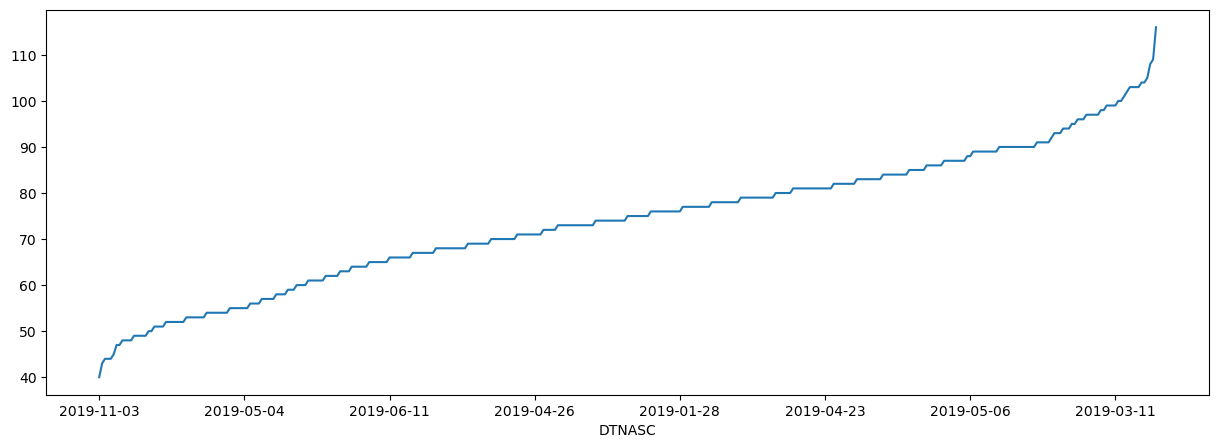

In [53]:
sinasc_3.groupby("DTNASC")["munResNome"].count().sort_values().plot(figsize=[15,5])

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')